In [1]:
import math
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
SHORT_SIZE = 10000

(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = tf.keras.datasets.fashion_mnist.load_data()
x_train_fmnist = x_train_fmnist.reshape(x_train_fmnist.shape[0], 28, 28, 1)
x_test_fmnist = x_test_fmnist.reshape(x_test_fmnist.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train_fmnist = x_train_fmnist.astype('float32')
x_test_fmnist = x_test_fmnist.astype('float32')
x_train_fmnist /= 255
x_test_fmnist /= 255

In [3]:
import sys
sys.path.append('/Users/dmitry/Desktop/Thesis/Libs')

In [4]:
import scenarios
from queries import query_entropy, query_entropy_sud
from models import create_sequential_model
from reshapes import reshape_mnist
from scores import score_sequential

In [8]:
entropy_test = scenarios.run_AL(query_entropy, create_sequential_model, reshape_mnist, score_sequential, 
                        x_train_fmnist, 
                        y_train_fmnist, 
                        x_test_fmnist, 
                        y_test_fmnist,
                        2000, 1, 10000, 10)

In [9]:
sbc_test = scenarios.run_AL_SBC(query_entropy, create_sequential_model, reshape_mnist, score_sequential, 
                            x_train_fmnist, 
                            y_train_fmnist, 
                            x_test_fmnist, 
                            y_test_fmnist,
                            2000, 1, 10000, 10)

In [5]:
sud_test = scenarios.run_AL_SUD(query_entropy_sud, create_sequential_model, reshape_mnist, score_sequential, 
                                x_train_fmnist, 
                                y_train_fmnist, 
                                x_test_fmnist, 
                                y_test_fmnist,
                                2000, 1, 10000, 10)

In [6]:
sbc_sud_test = scenarios.run_AL_SBC_SUD(query_entropy_sud, create_sequential_model, reshape_mnist, score_sequential, 
                                x_train_fmnist, 
                                y_train_fmnist, 
                                x_test_fmnist, 
                                y_test_fmnist,
                                2000, 1, 10000, 10)

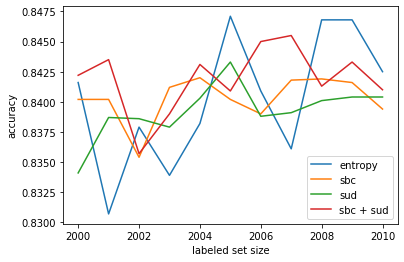

In [10]:
from plots import plot_single

plot_single(entropy_test, "entropy")
plot_single(sbc_test, "sbc")
plot_single(sud_test, "sud")
plot_single(sbc_sud_test, "sbc + sud")

plt.xlabel('labeled set size')
plt.ylabel('accuracy')
plt.legend()
plt.show()